In [3]:
# preamble
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and plot statistics for our code-switched corpus

In `PartitionAllocationOptimisatio.ipynb` we have shown how a dataset can be automatically partitioned into training, development, and test sets.
In this notebook we specifically aim to showcase just how multilingual our data is.

### Lets load in the dataset to showcase this:
* Again, our dataset consists of speech in eight languages where up to four languages are used in intra-sentential code-switching and consists of 307 speakers.

In [4]:
df = pd.read_csv("speech_per_speaker_per_language.csv")

df.head()

,speaker,AFR,ENG,FLY,NSO,SOT,TSN,XHO,ZUL,AFR-ENG,...,ENG-FLY-SOT-TSN,ENG-FLY-SOT-ZUL,ENG-FLY-TSN-ZUL,ENG-NSO-SOT-TSN,ENG-NSO-SOT-ZUL,ENG-NSO-TSN-ZUL,ENG-SOT-TSN-XHO,ENG-SOT-TSN-ZUL,ENG-SOT-XHO-ZUL,FLY-SOT-TSN-ZUL
0,SPEAKER_1,0.0,15.658,0.0,0.0,1.683,42.902,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SPEAKER_2,0.0,19.987,0.0,0.0,0.000,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SPEAKER_3,0.0,6.969,0.0,0.0,0.000,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SPEAKER_4,0.0,36.565,0.0,0.0,0.000,0.000,0.000,42.639,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SPEAKER_5,0.0,1431.205,0.0,0.0,110.253,43.627,0.563,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 95 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   speaker          307 non-null    object 
 1   AFR              307 non-null    float64
 2   ENG              307 non-null    float64
 3   FLY              307 non-null    float64
 4   NSO              307 non-null    float64
 5   SOT              307 non-null    float64
 6   TSN              307 non-null    float64
 7   XHO              307 non-null    float64
 8   ZUL              307 non-null    float64
 9   AFR-ENG          307 non-null    float64
 10  AFR-FLY          307 non-null    float64
 11  AFR-NSO          307 non-null    float64
 12  AFR-SOT          307 non-null    float64
 13  AFR-TSN          307 non-null    float64
 14  AFR-XHO          307 non-null    float64
 15  AFR-ZUL          307 non-null    float64
 16  ENG-FLY          307 non-null    float64
 17  ENG-NSO         

## Number of languages per speaker
To show how multilingual the dataset is, lets calculate the numbers of different combinations of languages uttered by each speaker.

* As evidenced in the dataframe, 94 distinct combinations of languages are present within utterances.

In [6]:
print(np.array(df.columns[1:])) # np.array __print__ is nicer

['AFR' 'ENG' 'FLY' 'NSO' 'SOT' 'TSN' 'XHO' 'ZUL' 'AFR-ENG' 'AFR-FLY'
 'AFR-NSO' 'AFR-SOT' 'AFR-TSN' 'AFR-XHO' 'AFR-ZUL' 'ENG-FLY' 'ENG-NSO'
 'ENG-SOT' 'ENG-TSN' 'ENG-XHO' 'ENG-ZUL' 'FLY-NSO' 'FLY-SOT' 'FLY-TSN'
 'FLY-ZUL' 'NSO-SOT' 'NSO-TSN' 'NSO-ZUL' 'SOT-TSN' 'SOT-XHO' 'SOT-ZUL'
 'TSN-XHO' 'TSN-ZUL' 'XHO-ZUL' 'AFR-ENG-FLY' 'AFR-ENG-NSO' 'AFR-ENG-SOT'
 'AFR-ENG-TSN' 'AFR-ENG-XHO' 'AFR-ENG-ZUL' 'AFR-FLY-NSO' 'AFR-FLY-SOT'
 'AFR-FLY-TSN' 'AFR-FLY-ZUL' 'AFR-SOT-TSN' 'AFR-SOT-ZUL' 'AFR-TSN-ZUL'
 'ENG-FLY-NSO' 'ENG-FLY-SOT' 'ENG-FLY-TSN' 'ENG-FLY-ZUL' 'ENG-NSO-SOT'
 'ENG-NSO-TSN' 'ENG-NSO-ZUL' 'ENG-SOT-TSN' 'ENG-SOT-XHO' 'ENG-SOT-ZUL'
 'ENG-TSN-XHO' 'ENG-TSN-ZUL' 'ENG-XHO-ZUL' 'FLY-NSO-SOT' 'FLY-NSO-TSN'
 'FLY-SOT-TSN' 'FLY-SOT-ZUL' 'FLY-TSN-ZUL' 'SOT-TSN-XHO' 'SOT-TSN-ZUL'
 'AFR-ENG-FLY-NSO' 'AFR-ENG-FLY-SOT' 'AFR-ENG-FLY-TSN' 'AFR-ENG-FLY-ZUL'
 'AFR-ENG-NSO-SOT' 'AFR-ENG-NSO-TSN' 'AFR-ENG-NSO-ZUL' 'AFR-ENG-SOT-TSN'
 'AFR-ENG-SOT-ZUL' 'AFR-ENG-TSN-ZUL' 'AFR-FLY-NSO-TSN' 'AFR-FLY-SOT-TSN'


## Show the number of speakers whose utterances contain a number of distinct language combinations

* From the figure:
  * 81 speakers only utter one language combination (NOTE: this can still be a code-switched sequence).
  * One speaker utterances contain 60 unique language combinations!!!
 

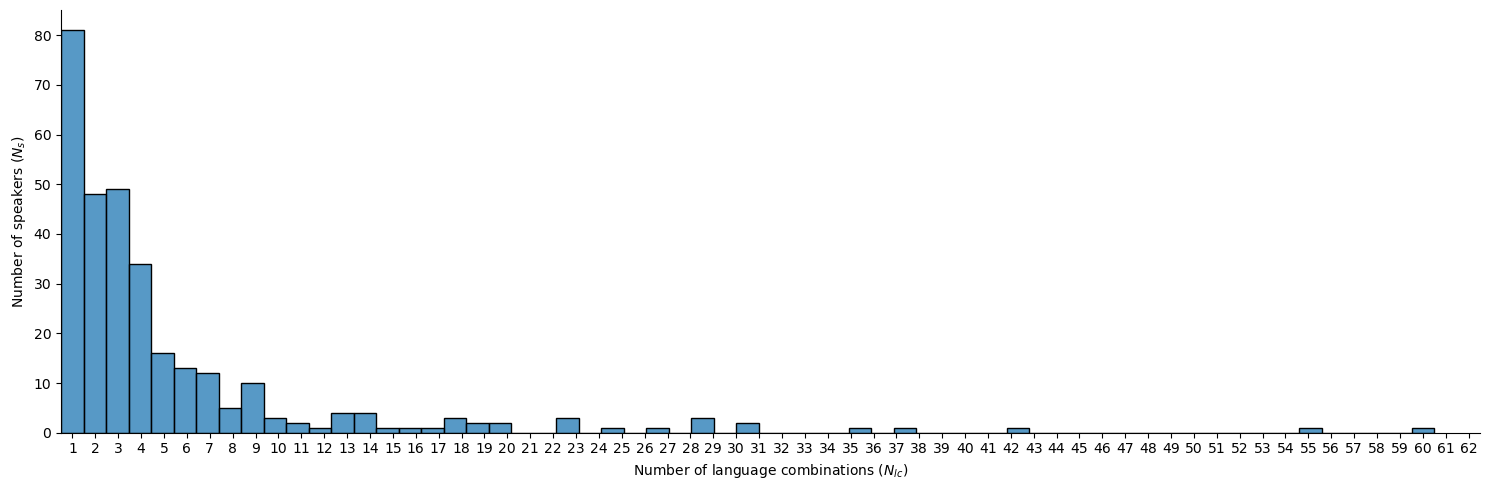

In [7]:
df_bin = df[df.columns[1:]] > 0 # 1 for all speakers who utter speech in a specific combination

# to get nice bin alignments 
min_val = 2
max_val = 63
val_width = max_val - min_val
n_bins = 61
bin_width = val_width/n_bins

ax = sns.displot(df_bin.sum(axis=1),aspect=3,bins=n_bins)

ax.set(xlim=(1, 63))
ax.set(xticks=np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width))
ax.set(xticklabels=[i for i in range(1,63,1)])
ax.set(ylabel="Number of speakers ($N_s$)")
ax.set(xlabel="Number of language combinations ($N_{lc}$)")

plt.rcParams["axes.labelsize"] = 12
plt.tight_layout()
plt.savefig("figs/number_of_uniq_lang_combinations_vs_num_speakers.pdf")

## The speaker who utterances the largest number of combinations is:

In [8]:
speaker_idx = np.array(df_bin).sum(-1).argmax(-1) # get speaker id
langs = np.array([col for col,_ in df_bin.iloc[speaker_idx].iteritems()]) # get language columns of their speech
print(df.iloc[speaker_idx].speaker) 
print(langs)

SPEAKER_72
['AFR' 'ENG' 'FLY' 'NSO' 'SOT' 'TSN' 'XHO' 'ZUL' 'AFR-ENG' 'AFR-FLY'
 'AFR-NSO' 'AFR-SOT' 'AFR-TSN' 'AFR-XHO' 'AFR-ZUL' 'ENG-FLY' 'ENG-NSO'
 'ENG-SOT' 'ENG-TSN' 'ENG-XHO' 'ENG-ZUL' 'FLY-NSO' 'FLY-SOT' 'FLY-TSN'
 'FLY-ZUL' 'NSO-SOT' 'NSO-TSN' 'NSO-ZUL' 'SOT-TSN' 'SOT-XHO' 'SOT-ZUL'
 'TSN-XHO' 'TSN-ZUL' 'XHO-ZUL' 'AFR-ENG-FLY' 'AFR-ENG-NSO' 'AFR-ENG-SOT'
 'AFR-ENG-TSN' 'AFR-ENG-XHO' 'AFR-ENG-ZUL' 'AFR-FLY-NSO' 'AFR-FLY-SOT'
 'AFR-FLY-TSN' 'AFR-FLY-ZUL' 'AFR-SOT-TSN' 'AFR-SOT-ZUL' 'AFR-TSN-ZUL'
 'ENG-FLY-NSO' 'ENG-FLY-SOT' 'ENG-FLY-TSN' 'ENG-FLY-ZUL' 'ENG-NSO-SOT'
 'ENG-NSO-TSN' 'ENG-NSO-ZUL' 'ENG-SOT-TSN' 'ENG-SOT-XHO' 'ENG-SOT-ZUL'
 'ENG-TSN-XHO' 'ENG-TSN-ZUL' 'ENG-XHO-ZUL' 'FLY-NSO-SOT' 'FLY-NSO-TSN'
 'FLY-SOT-TSN' 'FLY-SOT-ZUL' 'FLY-TSN-ZUL' 'SOT-TSN-XHO' 'SOT-TSN-ZUL'
 'AFR-ENG-FLY-NSO' 'AFR-ENG-FLY-SOT' 'AFR-ENG-FLY-TSN' 'AFR-ENG-FLY-ZUL'
 'AFR-ENG-NSO-SOT' 'AFR-ENG-NSO-TSN' 'AFR-ENG-NSO-ZUL' 'AFR-ENG-SOT-TSN'
 'AFR-ENG-SOT-ZUL' 'AFR-ENG-TSN-ZUL' 'AFR-FLY-NSO-TSN' 'AFR-FL

## Calculate the Distribution of proportion of dataset that is monolingual versus code-switched 

* For each grouping also calculate proportion per language
* This is plotted as a pie-chart

In [9]:
total = {}
total_cs = {}

for col in list(df.columns[1:]):
    if '-' in col:
        total_cs[col] = df[col].sum() / 60 / 60
    else:
        total[col] = df[col].sum() / 60 / 60

total = {i:j for i,j in sorted(total.items(), key=lambda x: x[1],reverse=True)}
total_cs = {i:j for i,j in sorted(total_cs.items(), key=lambda x: x[1],reverse=True)}


vals = np.zeros((2,6))
# adding up total monolingual data
vals[0,:5] = [total[col] for col in total][:5]
vals[0,5] = sum([total[col] for col in total][5:8])

# adding up total cs data
vals[1,:4] = [total_cs[col] for col in total_cs][:4] # eng - (zul,sot,tsn,xho)
vals[1,4] = [total_cs[col] for col in total_cs][5] # eng - nso
vals[1,5] = sum([total_cs[col] for col in total_cs][6:]) # all other CS
vals[1,5] += [total_cs[col] for col in total_cs][4] # eng-fly-zul

hours = [f"{f:.2f}" for f in vals.flatten()]
hours_as_percentage = [f"{f:.2f}" for f in (vals / vals.sum(-1)[:,np.newaxis] * 100).flatten()]

raw_labels = ["English","isiZulu","Setswana","Sesotho","isiXhosa","Other","English-isiZulu","English-Sesotho","English-Setswana","English-isiXhosa","English-Sepedi","Other"]

labels = [f"{s}\n({f1}h,{f2}%)" for s,f1,f2 in zip(raw_labels,hours,hours_as_percentage)]

total_2lang_cs = 0.
total_3lang_cs = 0.
total_4lang_cs = 0.

for i in total_cs:
    if len(i.split("-")) == 2 and i != 'ENG-ZUL' and i != 'ENG-SOT' and i != 'ENG-TSN' and i != 'ENG-XHO' and i != 'ENG-NSO':
        total_2lang_cs += total_cs[i]
    elif len(i.split("-")) == 3:
        total_3lang_cs += total_cs[i]
    elif len(i.split("-")) == 4:
        total_4lang_cs += total_cs[i]
        
print("2 Lang Other : ", total_2lang_cs)
print("3 Lang Other : ", total_3lang_cs)
print("4 Lang Other : ", total_4lang_cs)

2 Lang Other :  0.7756138888888889
3 Lang Other :  1.7130688888888894
4 Lang Other :  0.17334694444444443


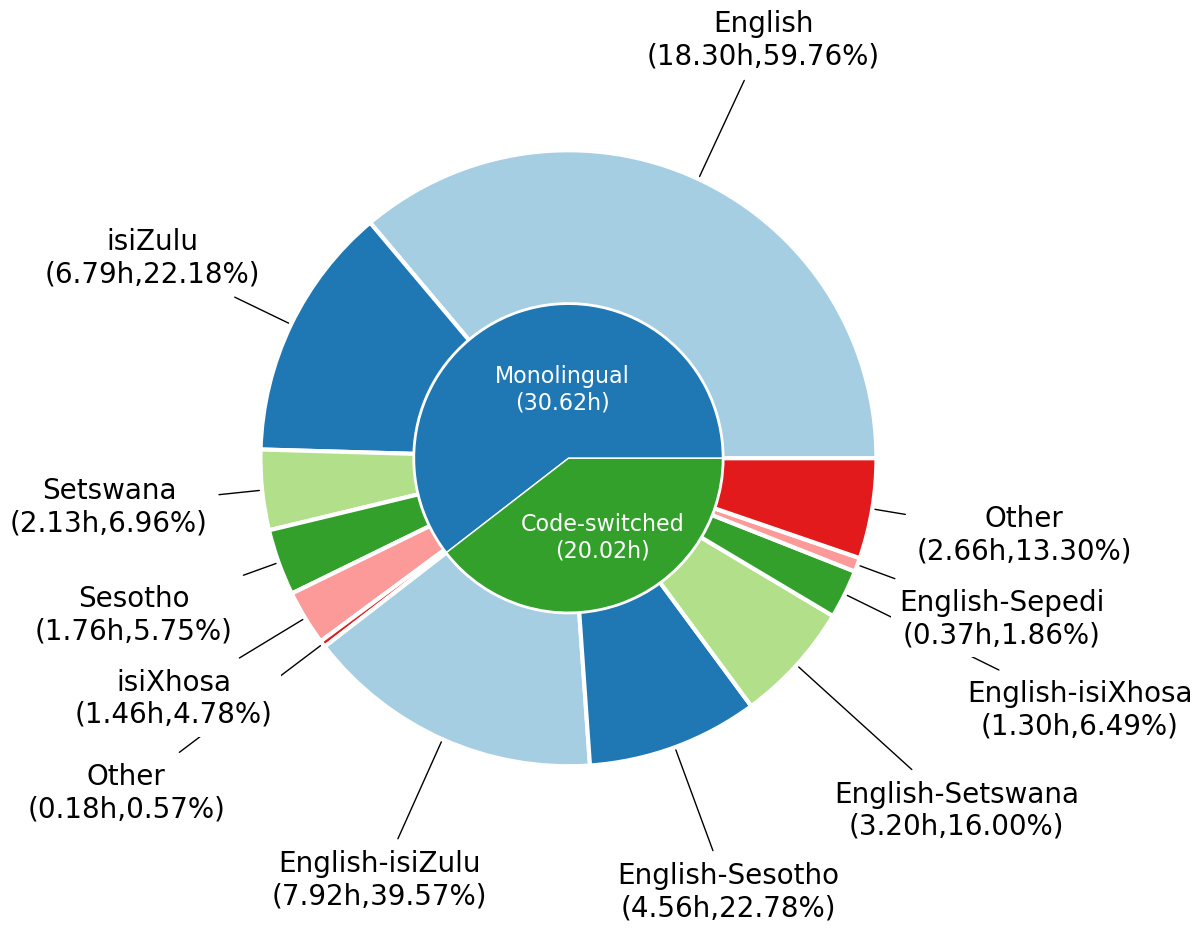

In [10]:
fig, ax = plt.subplots(figsize=(15,10))

size = 0.5 # inner / outer pie chart size

cmap = plt.colormaps["Paired"]

c = [cmap(int(i)) for i in range(6)]
c.extend([cmap(int(i)) for i in range(6)])

c_inner = [cmap(int(i)) for i in [1,3]]

wedges, texts = ax.pie(vals.flatten(), radius=1, colors=c,
       wedgeprops=dict(width=size, edgecolor='w',linewidth=3))

ax.pie(vals.sum(axis=1), radius=1-size, colors=c_inner,
       wedgeprops=dict(width=size, edgecolor='w',linewidth=1))

ax.set(aspect="equal")

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=1, va="center",fontsize=20)

kw = [kw for _ in range(12)]

kw[5] = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center",fontsize=20)

for i, p in enumerate(wedges):
   if labels[i] == '':
      continue
      
   ang = (p.theta2 - p.theta1)/2. + p.theta1
   y = np.sin(np.deg2rad(ang))
   x = np.cos(np.deg2rad(ang))

   # this makes the label alignment neat
   if i == 5:
      x_ext = 1.8 * x
      y_ext = y * 1.8
   elif i == 8:
      x_ext = 1.7 * x
      y_ext = y * 1.7
   elif i == 9:
      x_ext = 1.85 * x
      y_ext = y * 1.85
   else:
      x_ext = 1.5 * x
      y_ext = y * 1.5

   horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
   connectionstyle = "angle,angleA=0,angleB={}".format(ang)
   kw[i]["arrowprops"].update({"connectionstyle": connectionstyle})
   ax.annotate(labels[i], xy=(x, y), xytext=(x_ext, y_ext),
               horizontalalignment=horizontalalignment, ha='center', **kw[i])

plt.text(-0.02,0.16,"Monolingual\n(30.62h)",c="white",fontsize=16,fontweight='medium',ha='center')
plt.text(0.11,-0.32,"Code-switched\n(20.02h)",c="white",fontsize=16,fontweight='medium',ha='center')
plt.savefig("figs/language_proportions.pdf")

## Calculate language proportions for all code-switched utterances

[7.91982806 4.5590775  3.20300889 1.299275   0.4596475  0.37276389
 0.77561389 1.25342139 0.17334694]
['English-isiZulu', 'English-Sesotho', 'English-isiXhosa', 'English-Tsotsitaal-isiZulu', 'English-Sepedi', 'Other Bilingual', 'Other Trilingual', 'Other Quadlingual']


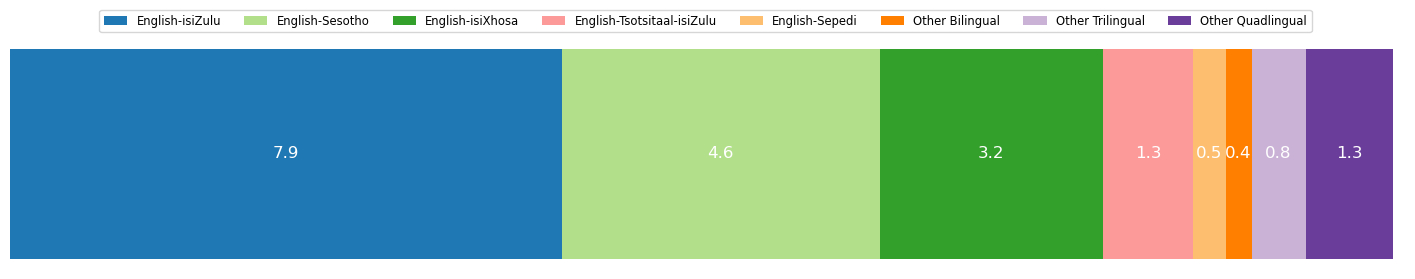

In [11]:
cs_vals = np.zeros(9)

cs_vals[:6] = [total_cs[c] for c in total_cs][:6] # store six largest code-switched portions
cs_labels = ["English-isiZulu","English-Sesotho","English-isiXhosa","English-Tsotsitaal-isiZulu","English-Sepedi"]

cs_vals[6] = total_2lang_cs # group all other bilingual CS
cs_labels.append("Other Bilingual")
cs_vals[7] = total_3lang_cs - [total_cs[c] for c in total_cs][4] # group all trilingual CS - minus 'ENG-FLY-ZUL'
cs_labels.append("Other Trilingual")
cs_vals[8] = total_4lang_cs # group all quadlingual CS
cs_labels.append("Other Quadlingual")

print(cs_vals)
print(cs_labels)

data_cum = cs_vals.cumsum()

category_colors = plt.colormaps['Paired'](
    np.linspace(0.15, 0.85, cs_vals.shape[0]))

fig, ax = plt.subplots(figsize=(18, 3))
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(cs_vals, axis=0).max())

bbox_args = dict(boxstyle="round", fc="0.8")
kw = dict(arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"),
          bbox=bbox_args, va="center",fontsize=13)

for i, (colname, color) in enumerate(zip(cs_labels, category_colors)):
    widths = cs_vals[i]
    starts = data_cum[i] - widths
    rects = ax.barh(0, widths, left=starts,
                    label=colname, color=color)
     
    x = starts + widths / 2
    y = 0
    
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.bar_label(rects, label_type='center', color=text_color,fontsize=12,fmt="%.1f")
    
    
ax.legend(ncol=len(cs_vals), bbox_to_anchor=(0.06, 1),
          loc='lower left', fontsize='small')
ax.axis('off')

plt.savefig("figs/code_switched_proportions.pdf")

## Calculate the number of speakers per language combination

In [12]:
per_lang_spks_bool = (df[df.columns[1:]] > 0).astype(int)
per_lang_spks = per_lang_spks_bool.sum()

print(40 * '-')
print("Monolingual")
print(per_lang_spks[:8])

print("Total \t " + str(per_lang_spks_bool[per_lang_spks[:8].keys()].max(axis=1).sum()))

print(40 * '-')
print("Code-switched")
main_cs_pairs = ['ENG-ZUL','ENG-XHO','ENG-SOT','ENG-TSN','ENG-NSO']
for lp in main_cs_pairs:
    print(lp + " \t " + str(per_lang_spks[lp]))

two_lang_cs_pairs = [] # bilingual
three_lang_cs_pairs = [] # trilingual
four_lang_cs_pairs = [] # quadrilingual
for lp in per_lang_spks_bool:
    if len(lp.split("-")) == 2 and lp not in main_cs_pairs:
        two_lang_cs_pairs.append(lp)
    elif len(lp.split("-")) == 3:
        three_lang_cs_pairs.append(lp)
    elif len(lp.split("-")) == 4:
        four_lang_cs_pairs.append(lp)
        
print("2-LANG \t\t " + str(per_lang_spks_bool[two_lang_cs_pairs].max(axis=1).sum()))
print("3-LANG \t\t " + str(per_lang_spks_bool[three_lang_cs_pairs].max(axis=1).sum()))
print("4-LANG \t\t " + str(per_lang_spks_bool[four_lang_cs_pairs].max(axis=1).sum()))
        
print("Total \t " + str(per_lang_spks_bool[per_lang_spks[8:].keys()].max(axis=1).sum()))

----------------------------------------
Monolingual
AFR     24
ENG    258
FLY     22
NSO     13
SOT     78
TSN     68
XHO     52
ZUL    168
dtype: int64
Total 	 303
----------------------------------------
Code-switched
ENG-ZUL 	 151
ENG-XHO 	 47
ENG-SOT 	 72
ENG-TSN 	 70
ENG-NSO 	 15
2-LANG 		 85
3-LANG 		 82
4-LANG 		 23
Total 	 218
